In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# set seed
np.random.seed(0)

# generate data

X = 30 * np.random.rand(100, 1)
y = 30 + 2 * X + 15 * np.random.rand(100, 1)


In [3]:
df = pd.DataFrame({'study_time': X.flatten(), 'score': y.flatten()})
df.head()

,study_time,score
0,16.464405,73.096058
1,21.455681,76.961482
2,18.082901,77.193713
3,16.346495,77.125819
4,12.709644,59.150585


Text(0, 0.5, 'Score')

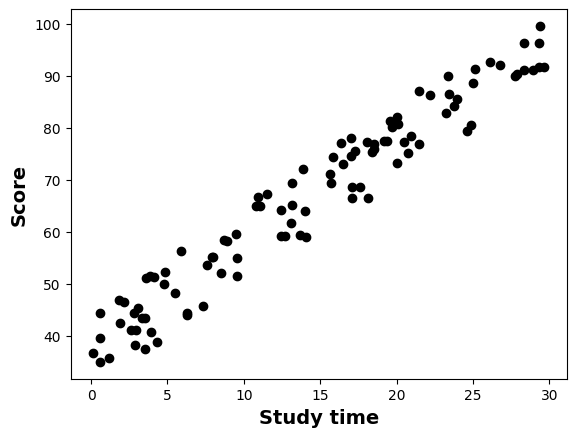

In [4]:
# plot data
# plt.rcParams['font.family'] = 'Times New Roman'
### if failed to find font, try to install it
### sudo apt-get install msttcorefonts -qq
### rm ~/.cache/matplotlib -rf

plt.scatter(df.study_time, df.score, color='k')
plt.xlabel('Study time', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')

# Linear Regression from Scratch

Hypothesis (Model): $$H(x) = y = w * x + b$$  
  
Cost Function (Loss Function, Error): $$J = \frac{1}{n} \sum_{i=1}^{n} ((w * x_i + b) - y_i)^2$$ $$(MSE:\ Mean\ Squared\ Error)$$ 
  
Goal: $$min\ J(w, b)$$  
Gradient:  
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{n} \sum_{i=1}^{n} 2*((w * x_i + b) - y_i) * (x_i)$$  
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{n} \sum_{i=1}^{n} 2*((w * x_i + b) - y_i) * (x_i)$$  

Gradient Descent:
$$w = w - \alpha * \frac{\partial{J}}{\partial{w}}$$ 
$$b = b - \alpha * \frac{\partial{J}}{\partial{b}}$$

In [5]:
def loss_function( w, b, points):
    total_error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (w * x + b)) ** 2
    total_error /= float(len(points))

def gradient_descent(w_now, b_now, points, learning_rate):
    dldw = 0 # w_gradient
    dldb = 0 # b_gradient

    n = len(points) # number of data points

    for i in range(n):
        X = points.iloc[i].study_time
        y = points.iloc[i].score

        # loss = (y - (w * X + b)) ** 2
        dldw += -(2/n) * X * (y - (w_now * X + b_now))
        dldb += -(2/n) * (y - (w_now * X + b_now))

    # update w and b
    w_new = w_now - learning_rate * dldw
    b_new = b_now - 20 * learning_rate * dldb

    return w_new, b_new

In [6]:
m = 0
b = 0
L = 0.0001
epochs = 1000

param_dict = {}

for i in range(epochs+1):
    m, b = gradient_descent(m, b, df, L)
    if i % 200 == 0:
        y_pred = m * df.study_time + b
        loss = np.divide(np.sum(np.square(df.score - y_pred)), len(df))
        print(f"Epoch: {i} | Loss: {loss:.3f}")
        print(f"    m: {m:.3f}, b: {b:.3f}")
        param_dict[i] = [m, b, loss]
print(f"\n final hyperparameters: m : {m:.3f}, {b:.3f}")

Epoch: 0 | Loss: 4207.745
    m: 0.217, b: 0.265
Epoch: 200 | Loss: 229.683
    m: 3.434, b: 10.383
Epoch: 400 | Loss: 157.954
    m: 3.161, b: 15.590
Epoch: 600 | Loss: 110.433
    m: 2.939, b: 19.829
Epoch: 800 | Loss: 78.950
    m: 2.759, b: 23.279
Epoch: 1000 | Loss: 58.093
    m: 2.612, b: 26.087

 final hyperparameters: m : 2.612, 26.087


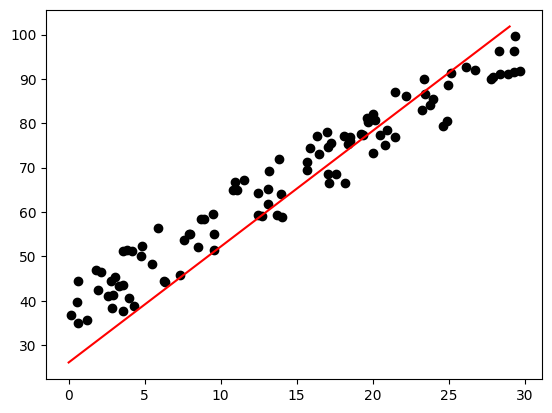

In [7]:
plt.scatter(df.study_time, df.score, color='black')
plt.plot(list(range(0, 30)), [m * x + b for x in range(0, 30)], color='red')

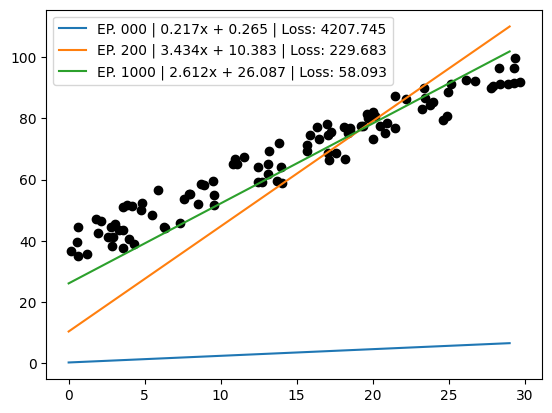

In [8]:
plt.scatter(df.study_time, df.score, color='black')
for key in [0, 200, 1000]:
    m = param_dict[key][0]
    b = param_dict[key][1]
    loss = param_dict[key][2]
    plt.plot(list(range(0, 30)), [m * x + param_dict[key][1] for x in range(0, 30)], label=f"EP. {key:03d} | {m:.3f}x + {b:.3f} | Loss: {loss:.3f}")
plt.legend()